# Support Vector Machine on MNIST Data
### 1 vs 5 Classification

Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report


c:\Users\Jai Sharma\CondaFiles\envs\ml_env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Helper Functions

In [2]:
def symmetry(input):
    """
    compute average symmetry value score for each image
    """
    flipped = np.flip(input,axis=1)
    matching = np.abs(input-flipped)
    return np.mean(matching, axis=1)

def intensity(input):
    """
    compute average intensity value score for each image
    """
    return np.mean(input, axis=1)

def evaluate_model(clf, X_train, y_train, X_test, y_test, train=True):
    """
    function to compute Model Accuracy and Classification Report
    """
    
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("=======================================================================================")
        print(f"Training Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("=======================================================================================")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("=======================================================================================")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("=======================================================================================")
        print(f"Testing Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("=======================================================================================")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("=======================================================================================")


Import Training Data

In [3]:
path = "Data/train_pr4.csv"
data = pd.read_csv(path)
X = np.array(data)[:,1:]         # features
y = np.array(data)[:,0]          # labels

Convert Feature data to Symmetry and Intensity Scores

In [4]:
# convert default feature information to intensity and symmetry scores
x_int = intensity(X).reshape(X.shape[0],1)
x_sym = symmetry(X).reshape(X.shape[0],1)

# split data - +1 and -1
xp1, xp2 = x_int[np.where(y==1)],x_sym[np.where(y==1)]
xn1, xn2 = x_int[np.where(y==5)],x_sym[np.where(y==5)]

# training data - features and labels
x_train = np.hstack((x_int, x_sym))   
y_train = y

Visualize Training Data

Text(0.5, 1.0, 'Training Data Set')

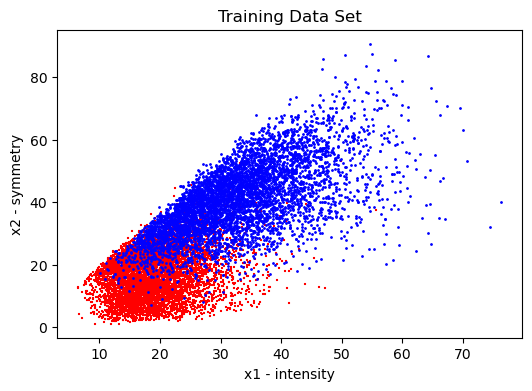

In [5]:
# plot the line, the points, and the nearest vectors to the plane
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(4)

# plot +1 and -1 labelled data
plt.scatter(xp1,xp2,c='r',label='1',marker='+', s=1)
plt.scatter(xn1,xn2,c='b',label='5',marker='o',s=1)

# general plot formatting
plt.xlabel("x1 - intensity")
plt.ylabel("x2 - symmetry")
plt.title("Training Data Set")

## SVM on Training Data

In [6]:

clf = svm.SVC(kernel="linear", C=10)
clf.fit(x_train,y_train)

# get parameters --> weights, biase and margins
w = clf.coef_[0]
a = -w[0] / w[1]
margin = 1 / np.sqrt(np.sum(clf.coef_**2))

print("The Weights are --> w1: ", np.round(w[0],3) , " | w2: ", np.round(w[1],3))
print("The Biased term is ---> b: ", np.round(a,3))
print("The Margin term is ---> margin: ", np.round(margin,3))

# Equation of Separator Hyperplane
xx = np.linspace(0,80)
yy = a * xx - (clf.intercept_[0]) / w[1]

# Equation of Decision Boundary
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin

# get accuracy of training model
print("Linear SVM Model")
evaluate_model(clf, x_train, y_train, 1,1, train=True)

The Weights are --> w1:  0.062  | w2:  0.16
The Biased term is ---> b:  -0.389
The Margin term is ---> margin:  5.829
Linear SVM Model
Training Accuracy Score: 90.71%
CLASSIFICATION REPORT:
                     1            5  accuracy     macro avg  weighted avg
precision     0.902467     0.913312  0.907095      0.907889      0.907300
recall        0.933254     0.874562  0.907095      0.903908      0.907095
f1-score      0.917602     0.893517  0.907095      0.905560      0.906868
support    6742.000000  5421.000000  0.907095  12163.000000  12163.000000


Text(0.5, 1.0, 'Linear SVM separator on Training Data')

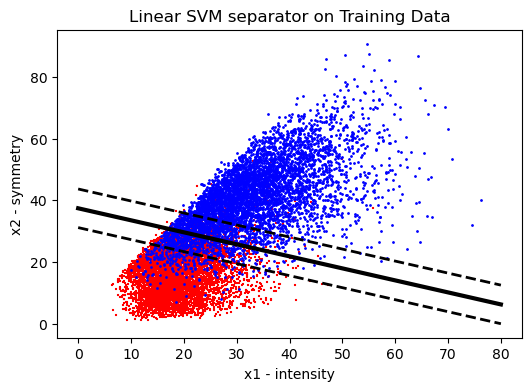

In [7]:
# plot the line, the points, and the nearest vectors to the plane
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(4)

# plot +1 and -1 labelled data
plt.scatter(xp1,xp2,c='r',label='1',marker='+', s=1)
plt.scatter(xn1,xn2,c='b',label='5',marker='o',s=1)

# plot separator, margins and decision boundary
plt.plot(xx, yy, "k-", label='separator', linewidth = 3)
plt.plot(xx, yy_down, "k--",linewidth = 2)
plt.plot(xx, yy_up, "k--",linewidth = 2)

# general plot formatting
plt.xlabel("x1 - intensity")
plt.ylabel("x2 - symmetry")
plt.title("Linear SVM separator on Training Data")

### Polynomial SVM on Training Data

In [8]:
model = svm.SVC(kernel='poly', degree=2)
model.fit(x_train, y_train)

# Create grid to evaluate model
xx_poly = yy_poly = np.linspace(0,80)
YY, XX = np.meshgrid(yy_poly, xx_poly)
xy_poly = np.vstack([XX.ravel(), YY.ravel()]).T

# compute separator and decision boundaries
Z = model.decision_function(xy_poly).reshape(XX.shape)

# get accuracy of testing model
print("Polynomial SVM Model [N = 2]")
evaluate_model(model, x_train, y_train, _, _, train=True)


Polynomial SVM Model [N = 2]
Training Accuracy Score: 90.83%
CLASSIFICATION REPORT:
                     1            5  accuracy     macro avg  weighted avg
precision     0.898456     0.921991  0.908329      0.910224      0.908946
recall        0.940967     0.867737  0.908329      0.904352      0.908329
f1-score      0.919220     0.894042  0.908329      0.906631      0.907998
support    6742.000000  5421.000000  0.908329  12163.000000  12163.000000


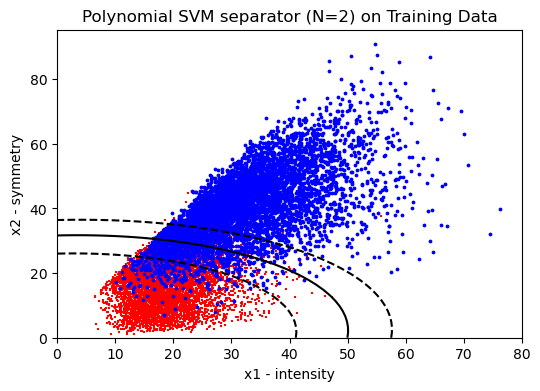

In [9]:
# plot trained polynomial SVM fit on training data
fig, ax = plt.subplots(figsize=(6,4))

# plot +1 and -1 labelled data
plt.scatter(xp1,xp2,c='r',label='1',marker='+', s=3)
plt.scatter(xn1,xn2,c='b',label='5',marker='o', s=3)

# plot separator, margins and decision boundary
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=1, linestyles=['--', '-', '--'])

# general plot formatting
plt.xlabel("x1 - intensity")
plt.ylabel("x2 - symmetry")
plt.title("Polynomial SVM separator (N=2) on Training Data")
plt.show()

## SVM on Testing Data

In [10]:
path = "Data/test_pr4.csv"
data = pd.read_csv(path)
X = np.array(data)[:,1:]         # features
y = np.array(data)[:,0]          # labels

# convert default feature information to intensity and symmetry scores
x_int = intensity(X).reshape(X.shape[0],1)
x_sym = symmetry(X).reshape(X.shape[0],1)

# split data - +! and -1
xp1, xp2 = x_int[np.where(y==1)],x_sym[np.where(y==1)]
xn1, xn2 = x_int[np.where(y==5)],x_sym[np.where(y==5)]

# training data - features and labels
x_test = np.hstack((x_int, x_sym))   
y_test = y

# get accuracy of testing model
print("Linear SVM Model")
evaluate_model(clf, x_train, y_train, x_test, y_test, train=False)
print(" ")
print(" ")
print(" ")
print("Polynomial SVM Model [N = 2]")
# get accuracy of testing model
evaluate_model(model, x_train, y_train, x_test, y_test, train=False)

Linear SVM Model
Testing Accuracy Score: 91.51%
CLASSIFICATION REPORT:
                     1           5  accuracy    macro avg  weighted avg
precision     0.916162    0.913793  0.915146     0.914978      0.915120
recall        0.933921    0.891256  0.915146     0.912588      0.915146
f1-score      0.924956    0.902384  0.915146     0.913670      0.915023
support    1135.000000  892.000000  0.915146  2027.000000   2027.000000
 
 
 
Polynomial SVM Model [N = 2]
Testing Accuracy Score: 91.66%
CLASSIFICATION REPORT:
                     1           5  accuracy    macro avg  weighted avg
precision     0.912116    0.922807  0.916626     0.917462      0.916821
recall        0.941850    0.884529  0.916626     0.913190      0.916626
f1-score      0.926745    0.903263  0.916626     0.915004      0.916411
support    1135.000000  892.000000  0.916626  2027.000000   2027.000000


Visualize Test Data with Trained SVM hyperplane

Text(0.5, 1.0, 'Linear SVM separator on Testing Data')

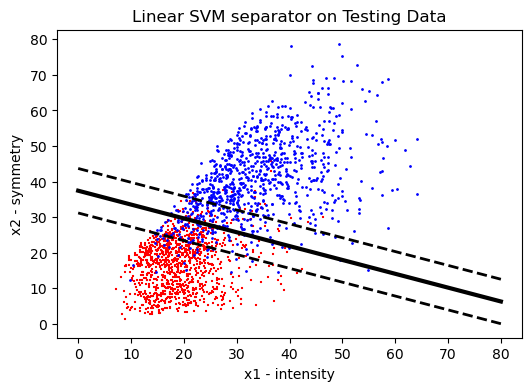

In [11]:
# plot the line, the points, and the nearest vectors to the plane
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(4)
# plot +1 and -1 labelled data
plt.scatter(xp1,xp2,c='r',label='1',marker='+', s=1)
plt.scatter(xn1,xn2,c='b',label='5',marker='o',s=1)

# plot separator, margins and decision boundary
plt.plot(xx, yy, "k-", label='separator', linewidth = 3)
plt.plot(xx, yy_down, "k--",linewidth = 2)
plt.plot(xx, yy_up, "k--",linewidth = 2)

# general plot formatting
plt.xlabel("x1 - intensity")
plt.ylabel("x2 - symmetry")
plt.title("Linear SVM separator on Testing Data")

Text(0.5, 1.0, 'Polynomial SVM separator (N=2) on Testing Data')

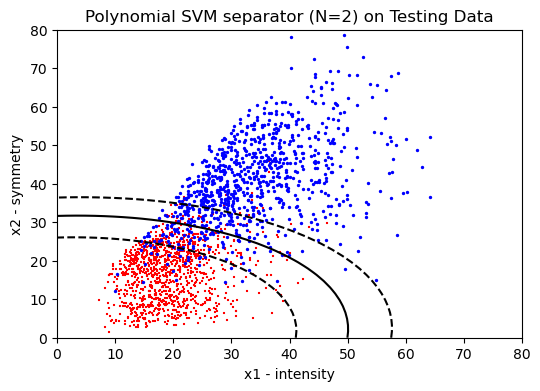

In [12]:
# plot the line, the points, and the nearest vectors to the plane
f = plt.figure()
f.set_figwidth(6)
f.set_figheight(4)

# plot +1 and -1 labelled data
plt.scatter(xp1,xp2,c='r',label='1',marker='+', s=2)
plt.scatter(xn1,xn2,c='b',label='5',marker='o',s=2)

# plot separator, margins and decision boundary
plt.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=1.0, linestyles=['--', '-', '--'])

# general plot formatting
plt.xlabel("x1 - intensity")
plt.ylabel("x2 - symmetry")
plt.title("Polynomial SVM separator (N=2) on Testing Data")
